<a href="https://colab.research.google.com/github/Vishnu0192/100-pandas-puzzles/blob/master/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction with Neural Network in Tensorflow

In [2]:
# Import Tensorflow

import tensorflow as tf
print(tf.__version__)

2.8.2


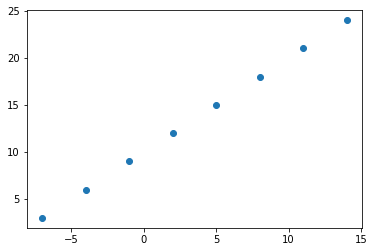

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create Labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize It
plt.scatter(X, y);

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

Input and Ouput Shapes

In [5]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [8]:
X[0].ndim

0

In [9]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

Steps in modelling with Tensorflow

In [13]:
# Set random seed
tf.random.set_seed(42)

#1. Create a model using the Sequential API
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae - Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(), #Stochastic Gradient Descent)
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 662ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 22ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [14]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [15]:
# Try and make a prediction
model.predict([17.0])

array([[12.716021]], dtype=float32)

# How we can improve our model?

- We can improve the model by altering the steps taken to create a model ( add multiple layers, increase the number of hidden units(neurons) within each hidden layer, change activation funciton of each layer. / compile a model (change the optimization function or the learning rate of the optimization function)/ fit a model (more epochs or provide more data to learn from)



In [16]:
#1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae - Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(), #Stochastic Gradient Descent)
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 290ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 5

In [17]:
# Recheck the model

model.predict([17.0])

array([[29.739855]], dtype=float32)

In [22]:
#1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae - Mean Absolute Error
              optimizer=tf.keras.optimizers.Adam(lr=0.01), #Stochastic Gradient Descent)
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 410ms/step - loss: 13.1407 - mae: 13.1407
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 12.2077 - mae: 12.2077
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 11.2680 - mae: 11.2680
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.3252 - mae: 10.3252
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 9.4528 - mae: 9.4528
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 8.7088 - mae: 8.7088
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 7.9448 - mae: 7.9448
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 7.1507 - mae: 7.1507
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 6.3266 - mae: 6.3266
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 5.4703 - mae: 5.4703
Epoch 11/100
1/1 [==============================] - 0s 13ms/step - loss: 4.5825

In [23]:
# Rechecking the model?

model.predict([17.0])

array([[26.5912]], dtype=float32)

In [ ]:
#1. Create a model using the Sequential API
improved_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
improved_model.compile(loss=tf.keras.losses.mae, # mae - Mean Absolute Error
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), #Adam Optimizer)
              metrics=["mae"])

# 3. Fit the model
improved_model.fit(tf.expand_dims(X,axis=-1), y, epochs=100)

## Evaluating a model

In practice, a typical workflow is build a model - compile the model - fit the model - tweak a model - fit it - tweak a model - fit it?

In [25]:
# Visualize in order to evaluate your model?

# Make a bigger data set

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [26]:
# Make labels for the data
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

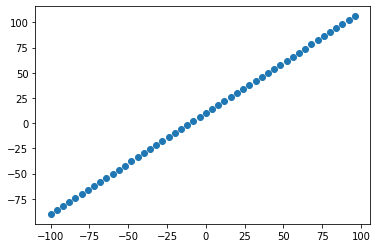

In [27]:
# Visualize the data

import matplotlib.pyplot as plt
plt.scatter(X,y)


### The 3 sets ...

* Training Set - Model learns from the data (70-80%)
* Validation Set (10-15%)
* Test Set (10-15%))


In [29]:
# Check the length
len (X)

50

In [30]:
# Split the data into train and test set

X_train = X[:40] # first 40 are training sample
X_test = X[40:] # last 10 are the test data

y_train = y[:40]
y_test = y[40:]

len(X_test), len(X_train), len(y_test), len(y_train)

(10, 40, 10, 40)

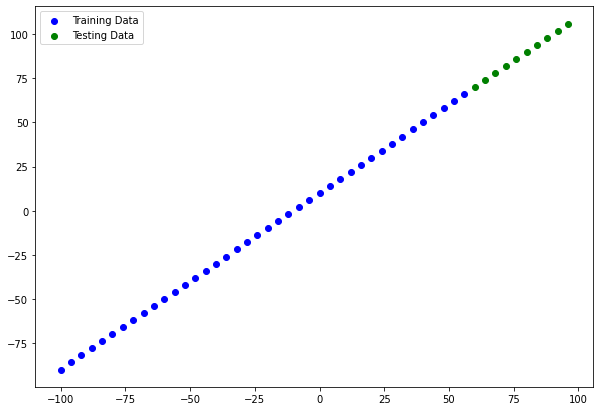

In [31]:
# Visualize

plt.figure(figsize=(10,7))

# Plot training data in blue and test data in green and show legends

plt.scatter(X_train, y_train, c="b", label="Training Data")
plt.scatter(X_test, y_test, c="g", label="Testing Data")
plt.legend()

In [32]:
# Model 

#1. Create a model using the Sequential API
model = tf.keras.Sequential([
    #tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae - Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(), #Stochastic Gradient Descent)
              metrics=["mae"])

# 3. Fit the model
#model.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100)

In [37]:
#1. Create a model using the Sequential API
model = tf.keras.Sequential([
    #tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae - Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(), #Stochastic Gradient Descent)
              metrics=["mae"])

# 3. Fit the model
#model.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100)

In [38]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [39]:
# 3. Fit the model
model.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100, verbose = 1)

Epoch 1/100
2/2 [==============================] - 0s 13ms/step - loss: 26.9568 - mae: 26.9568
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 9.2571 - mae: 9.2571
Epoch 3/100
2/2 [==============================] - 0s 19ms/step - loss: 7.8091 - mae: 7.8091
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 8.7897 - mae: 8.7897
Epoch 5/100
2/2 [==============================] - 0s 22ms/step - loss: 10.7443 - mae: 10.7443
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 9.9378 - mae: 9.9378
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 8.9948 - mae: 8.9948
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 9.0815 - mae: 9.0815
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 19.8113 - mae: 19.8113
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 10.7048 - mae: 10.7048
Epoch 11/100
2/2 [==============================] - 0s 10ms/step

In [40]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [42]:
from tensorflow.keras.utils import plot_model


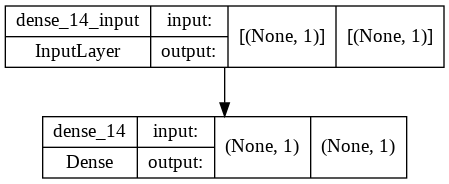

In [44]:
plot_model(model, show_shapes=True)

In [45]:
### Visualizing our model predictions

y_pred = model.predict(X_test)
y_pred

array([[44.402916],
       [47.276276],
       [50.149635],
       [53.023003],
       [55.896362],
       [58.769722],
       [61.64308 ],
       [64.51644 ],
       [67.3898  ],
       [70.26316 ]], dtype=float32)

In [48]:
# lets create a function
def plot_predictions( train_data = X_train,
                       train_label = y_train,
                       test_data = X_test,
                       test_label = y_test,
                       predictions = y_pred):

  """
  Plot the training and testing data.
  """

  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_label, c="b", label="Training data")
  plt.scatter(test_data, test_label, c="g", label="Testing data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend();

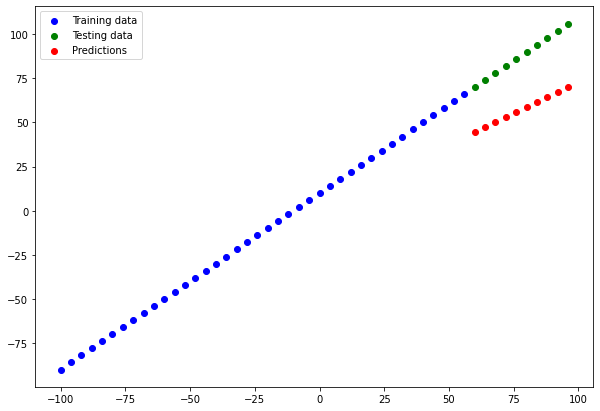

In [50]:
plot_predictions()

### Evaluting our model predictions

Regression Model - the two main metrics are
* MAE
* MSE 
* Huber

In [51]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 402ms/step - loss: 30.6670 - mae: 30.6670


[30.666961669921875, 30.666961669921875]

In [56]:
# Calculate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=30.666962>

In [57]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=950.93427>

In [54]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([44.402916, 47.276276, 50.149635, 53.023003, 55.896362, 58.769722,
       61.64308 , 64.51644 , 67.3898  , 70.26316 ], dtype=float32)>

In [59]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)

In [ ]:
### 